In [1]:
import networkx as nx
k=9

G = nx.complete_graph(k)
pos = nx.circular_layout(G)

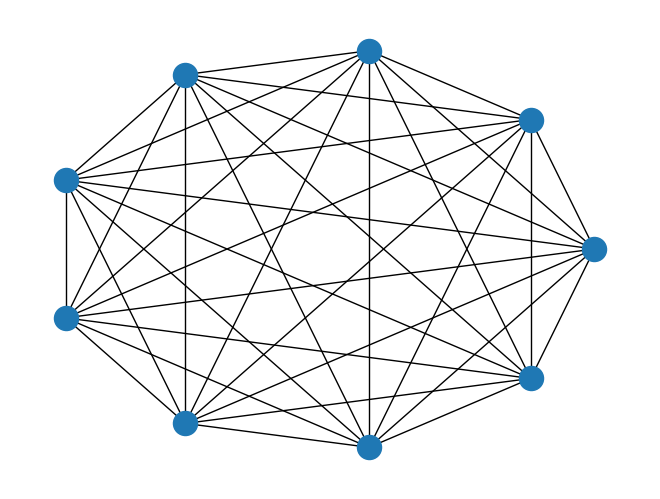

In [3]:
import matplotlib.pyplot as plt
nx.draw(G, pos=pos)  # networkx draw()
plt.draw()  # pyplot draw()

In [5]:
[G.add_edge(i,i) for i in range(k)]

[None, None, None, None, None, None, None, None, None]

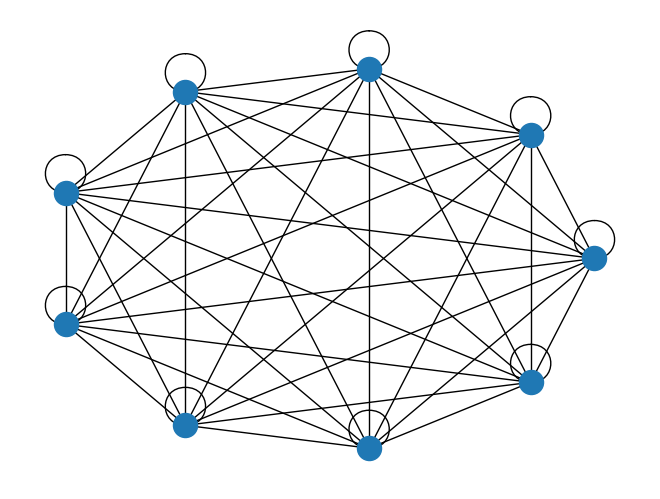

In [7]:
pos = nx.circular_layout(G)
nx.draw(G, pos=pos)  # networkx draw()
plt.draw()  # pyplot draw()